<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/reference_ml_links.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://techblog-history-younghunjo1.tistory.com/108

[ML] K-means 와 GMM(Gaussian Mixture Model) 구현하기

수식없이 이해하는 Gaussian Mixture Model

https://3months.tistory.com/154

https://www.google.com/url?sa=t&source=web&rct=j&url=https://www.koreascience.or.kr/article/JAKO202213159015595.pdf&ved=2ahUKEwiUtpLLzvz7AhXmpVYBHWyNCIEQFnoECB4QAQ&usg=AOvVaw2Ko-Ntg65-IsVIoFx_XUsc

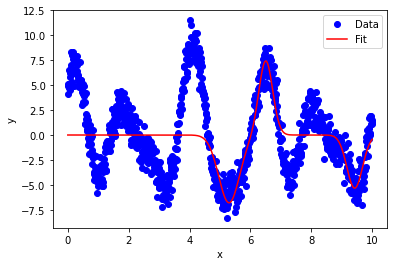

[-5.32895834  9.4262473   0.36292257 -6.79477799  5.29788947  0.48365332
  7.43755862  6.50429653  0.3210541 ]


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gauss(x, *params):
    """
    Gaussian function for curve fitting.
    
    Parameters
    ----------
    x : numpy array
        Independent variable
    *params : tuple
        Tuple of parameters for the Gaussian function: (amplitude, mean, standard deviation)
        
    Returns
    -------
    numpy array
        Gaussian function evaluated at x
    """
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        amp, mean, std = params[i:i+3]
        y += amp * np.exp(-((x - mean) / std)**2)
    return y


# Generate fake data with multiple peaks
x = np.linspace(0, 10, 1000)
y = 3 * np.sin(2 * x) + 5 * np.cos(3 * x) + 2 * np.sin(5 * x)

# Add some noise to the data
y += np.random.normal(0, 1, len(y))


# Fit the peaks
params, _ = curve_fit(gauss, x, y, p0=[1, 5, 1, 1, 5, 1, 1, 7, 1])


# Plot the data and the fitted peaks
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, gauss(x, *params), 'r', label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(params)

In [ ]:

import numpy as np

def generate_xrd_data(num_peaks=3, peak_intensities=[100, 50, 25], peak_wavelengths=[1.5, 2.0, 2.5],
                      width=0.1, noise_level=0.1):
    """
    Generates synthetic XRD data with multiple peaks.
    
    Parameters:
    - num_peaks: number of peaks to generate (default: 3)
    - peak_intensities: list of peak intensities (default: [100, 50, 25])
    - peak_wavelengths: list of peak wavelengths (default: [1.5, 2.0, 2.5])
    - width: width of the peaks (default: 0.1)
    - noise_level: level of noise to add to the data (default: 0.1)
    
    Returns:
    - wavelengths: array of wavelengths
    - intensities: array of intensities
    """
    # Generate a grid of wavelengths
    min_wavelength = min(peak_wavelengths) - width
    max_wavelength = max(peak_wavelengths) + width
    wavelengths = np.linspace(min_wavelength, max_wavelength, 100)
    
    # Generate a synthetic XRD spectrum with multiple peaks
    intensities = np.zeros_like(wavelengths)
    for i in range(num_peaks):
        intensities += peak_intensities[i] / (1 + ((wavelengths - peak_wavelengths[i]) / width)**2)
    
    # Add noise to the data
    intensities += noise_level * np.random.randn(len(wavelengths))
    
    return wavelengths, intensities

In [ ]:

import numpy as np

# Generate XRD data with 3 peaks
wavelengths, intensities = generate_xrd_data()

# Generate XRD data with 5 peaks, custom peak intensities and wavelengths, and a wider peak width
wavelengths, intensities = generate_xrd_data(num_peaks=5, peak_intensities=[200, 150, 100, 50, 25], 
                                             peak_wavelengths=[1.2, 1.7, 2.2, 2.7, 3.2], width=0.2)

# Generate XRD data with 2 peaks and a higher level of noise
wavelengths, intensities = generate_xrd_data(num_peaks=2, peak_intensities=[100, 50], 
                                             peak_wavelengths=[1.5, 2.0], noise_level=0.5)

In [ ]:

import numpy as np

# Define the number of peaks
num_peaks = 3

# Generate XRD data with the specified number of peaks
wavelengths, intensities = generate_xrd_data(num_peaks=num_peaks)

# Fit a Lorentzian curve to each peak
parameters = []
for i in range(num_peaks):
    init_vals = [peak_intensities[i], peak_wavelengths[i], 0.1]
    params, _ = curve_fit(lorentzian, wavelengths, intensities, p0=init_vals)
    parameters.append(params)

In [ ]:

import numpy as np

# Define the peak intensities and wavelengths
peak_intensities = [100, 50, 25]
peak_wavelengths = [1.5, 2.0, 2.5]

# Generate XRD data with the specified peak intensities and wavelengths
wavelengths, intensities = generate_xrd_data(num_peaks=len(peak_intensities), peak_intensities=peak_intensities, 
                                             peak_wavelengths=peak_wavelengths)

# Fit a Lorentzian curve to each peak
parameters = []
for i in range(len(peak_intensities)):
    init_vals = [peak_intensities[i], peak_wavelengths[i], 0.1]
    params, _ = curve_fit(lorentzian, wavelengths, intensities, p0=init_vals)
    parameters.append(params)

In [ ]:

import numpy as np

def lorentzian(wavelength, intensity, center, width):
    """
    Returns the value of a Lorentzian curve at a given wavelength.
    
    Parameters:
    - wavelength: wavelength at which to evaluate the curve
    - intensity: intensity of the peak
    - center: center wavelength of the peak
    - width: width of the peak
    
    Returns:
    - value: value of the Lorentzian curve at the given wavelength
    """
    value = intensity / (1 + ((wavelength - center) / width)**2)
    return value

In [ ]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from scipy.optimize import curve_fit

# Define the elements corresponding to the peaks
elements = ['Cu', 'Zn', 'Fe']
peak_intensities = [100, 50, 25]
peak_wavelengths = [1.5, 2.0, 2.5]
# Generate XRD data with multiple peaks
wavelengths, intensities = generate_xrd_data(num_peaks=len(elements), peak_intensities=peak_intensities,
                                             peak_wavelengths=peak_wavelengths)

# Fit a Lorentzian curve to each peak
parameters = []
for i in range(num_peaks):
    init_vals = [peak_intensities[i], peak_wavelengths[i], 0.1]
    params, _ = curve_fit(lorentzian, wavelengths, intensities, p0=init_vals, maxfev=5000   )
    parameters.append(params)

# Use machine learning to identify the element corresponding to each peak
X = np.array(parameters)
y = np.array(elements)

# Initialize and train the machine learning model
model = RandomForestClassifier()
model.fit(X, y)

# Define a new peak for which to predict the element
peak_intensity = 75
peak_wavelength = 1.8
new_peak = [peak_intensity, peak_wavelength, 0.1]

# Predict the element corresponding to the new peak
prediction = model.predict([new_peak])
print(f"The element corresponding to the peak is: {prediction[0]}")

The element corresponding to the peak is: Fe
